In [34]:
import pandas as pd
import scipy.stats as stats #for statistical calculations
import numpy as np

In [35]:
def filter_pets(df, pet_type=None, breed=None, max_age_months=None, color=None, size=None, adopted = None):
    """
    Filter the pets DataFrame based on specified criteria.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing pet data.
    pet_type (str): The type of pet to filter by.
    breed (str): The breed of the pet to filter by.
    max_age_months (int): The maximum age of the pet in months to filter by (pets younger than this age).
    color (str): The color of the pet to filter by. ('white', 'black', 'orange')
    size (str): The size of the pet to filter by. ('small', 'medium', 'large')
    
    Returns:
    pd.DataFrame: A DataFrame filtered by the specified criteria.
    pd.DataFrame: A complementary DataFrame with pets that do not match the criteria.
    """
    
    df_filtered = df
    df_complementary = df
    
    # Filter by pet type if specified
    if pet_type:
        df_filtered = df_filtered[df_filtered['PetType'] == pet_type]
        df_complementary = df_complementary[df_complementary['PetType'] == pet_type]
        
    # Apply filters to get the main subset
    if breed:
        df_filtered = df_filtered[df_filtered['Breed'] == breed]
    if max_age_months is not None:
        df_filtered = df_filtered[df_filtered['AgeMonths'] < max_age_months]
    if color:
        df_filtered = df_filtered[df_filtered['Color'] == color]

    if adopted:
        df_filtered = df_filtered[df_filtered['AdoptionLikelihood'] == adopted]
        df_complementary = df_complementary[df_complementary['AdoptionLikelihood'] == adopted]
    if size:
        df_filtered = df_filtered[df_filtered['Size'] == size]
    
    # Create the complementary subset by excluding the filtered results
    df_complementary = df_complementary[~df_complementary.index.isin(df_filtered.index)]
    
    return df_filtered, df_complementary

In [36]:
data_frame = pd.read_csv("pet_adoption_data.csv")
data_frame.head()


,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [37]:
data_frame['Color'].unique()

array(['Orange', 'White', 'Gray', 'Brown', 'Black'], dtype=object)

In [38]:
dogs = data_frame.query("PetType == 'Dog'")
dogs
white_dogs = dogs.query("Color == 'White'")
small_dogs = white_dogs.query("Size == 'Small'")
else_dogs = dogs.query("Color != 'White'")
else_dogs = pd.concat([else_dogs,white_dogs.query("Size != 'Small'")])
print(len(else_dogs),len(small_dogs))
small_dogs = small_dogs.query("AdoptionLikelihood == 1")
else_dogs = else_dogs.query("AdoptionLikelihood == 1")
print(len(else_dogs),len(small_dogs))
stats.mannwhitneyu(np.array(small_dogs['TimeInShelterDays']),np.array(else_dogs['TimeInShelterDays']),alternative='less')

482 40
226 16


MannwhitneyuResult(statistic=1315.5, pvalue=0.03450025015193805)

In [39]:
def U_test(df, pet_type=None, breed=None, max_age_months=None, color=None, size=None, adopted = None,direction = 'two-sided'):
    pets = filter_pets(df,pet_type, breed, max_age_months, color, size, adopted )
    return stats.mannwhitneyu(np.array(pets[0]['TimeInShelterDays']),np.array(pets[1]['TimeInShelterDays']),alternative=direction)

In [40]:
U_test(data_frame,pet_type='Cat',color='Orange',adopted=1,direction='greater')

MannwhitneyuResult(statistic=2162.5, pvalue=0.099646495860501)

In [41]:
U_test(data_frame,pet_type='Dog',size='Small',color='White',adopted=1,direction='less')

MannwhitneyuResult(statistic=1315.5, pvalue=0.03450025015193805)

find the empirical function of small_white_dog and orange_cats

In [42]:
dogs = data_frame.query("PetType == 'Dog'")
white_dogs = dogs.query("Color == 'White'")
small_dogs = white_dogs.query("Size == 'Small'")
small_dogs.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
23,523,Dog,Golden Retriever,86,White,Small,8.475576,1,0,30,405,0,0
54,554,Dog,Golden Retriever,23,White,Small,26.127081,1,0,63,206,0,1
164,664,Dog,Labrador,130,White,Small,18.482545,1,0,36,18,0,1
182,682,Dog,Poodle,4,White,Small,4.422175,1,0,1,222,0,1
188,688,Dog,Poodle,124,White,Small,6.071634,1,0,7,9,0,0


In [43]:
check = filter_pets(data_frame,pet_type="Dog",color="White",size="Small",adopted=1)
print(len(check[0]),len(check[1]))
print(check[0].head())
print(check[1].head())


16 226
     PetID PetType             Breed  AgeMonths  Color   Size   WeightKg  \
54     554     Dog  Golden Retriever         23  White  Small  26.127081   
164    664     Dog          Labrador        130  White  Small  18.482545   
182    682     Dog            Poodle          4  White  Small   4.422175   
536   1036     Dog          Labrador         39  White  Small   5.211526   
858   1358     Dog          Labrador        131  White  Small  24.473397   

     Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  \
54            1                0                 63          206   
164           1                0                 36           18   
182           1                0                  1          222   
536           1                0                  9          307   
858           1                0                 51          119   

     PreviousOwner  AdoptionLikelihood  
54               0                   1  
164              0                   1  
182 

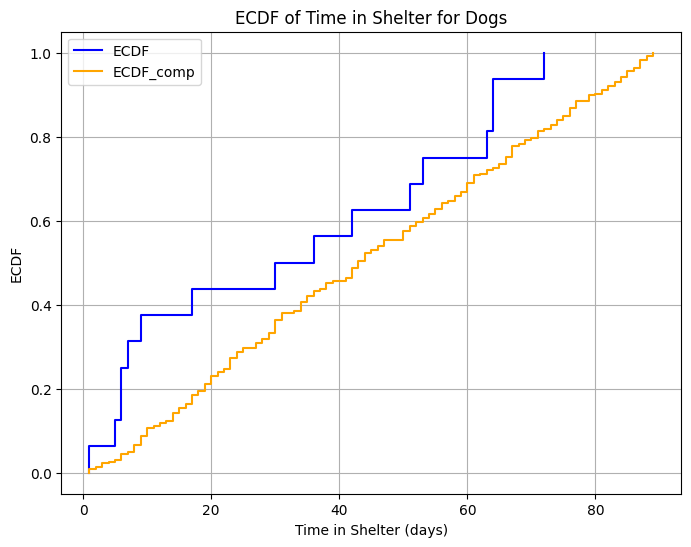

In [44]:



import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

dogs_df = check[0]
time_in_shelter = dogs_df['TimeInShelterDays']

# Compute the ECDF
ecdf = ECDF(time_in_shelter)

#complanitory
dogs_df_comp = check[1]
time_in_shelter_comp = dogs_df_comp['TimeInShelterDays']

# Compute the ECDF
ecdf_comp = ECDF(time_in_shelter_comp)

# Plot the ECDF
plt.figure(figsize=(8, 6))
plt.step(ecdf.x, ecdf.y, where='post', label='ECDF', color='blue')
plt.step(ecdf_comp.x, ecdf_comp.y, where='post', label='ECDF_comp', color='orange')

plt.xlabel('Time in Shelter (days)')
plt.ylabel('ECDF')
plt.title('ECDF of Time in Shelter for Dogs')
plt.legend()
plt.grid(True)
plt.show()


lets check if each pet type distribute normal - we will use kolmogorov - smirnof.(using to test wheater or not sample comes from certin distribution)

In [45]:
from scipy.stats import kstest
import numpy

data = filter_pets(data_frame,adopted=1,pet_type="Dog")[0]
#print(data.head(),data['TimeInShelterDays'].to_numpy())
#perform Kolmogorov-Smirnov test
kstest(data['TimeInShelterDays'].to_numpy(), 'norm')

KstestResult(statistic=0.9821211763485351, pvalue=0.0, statistic_location=3, statistic_sign=-1)

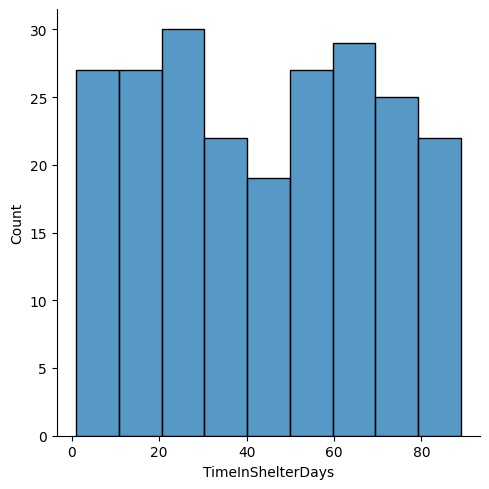

In [46]:
import seaborn as sns
data = filter_pets(data_frame,adopted=1,pet_type="Dog",max_age_months=6)[1]
#print(data['TimeInShelterDays'])
sns.displot(data,x="TimeInShelterDays")

learning prediction

lets first handle catagorial features:

In [47]:
def create_mapping_and_replace(data_frame, column):
    unique_values = data_frame[column].unique()
    value_mapping = {name: idx for idx, name in enumerate(unique_values)}
    data_frame[column] = data_frame[column].map(value_mapping)
    return value_mapping


# List of columns to be encoded
#encode because maybe have relations
columns_to_encode = {'PetType','Size'}

# Dictionaries to store the mappings
mappings = {}

for col in columns_to_encode:
    mappings[col] = create_mapping_and_replace(data_frame, col)

print(data_frame.head())
print(data_frame['PetType'].unique())

   PetID  PetType             Breed  AgeMonths   Color  Size   WeightKg  \
0    500        0          Parakeet        131  Orange     0   5.039768   
1    501        1            Rabbit         73   White     0  16.086727   
2    502        2  Golden Retriever        136  Orange     1   2.076286   
3    503        0          Parakeet         97   White     2   3.339423   
4    504        1            Rabbit        123    Gray     0  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1             

In [48]:
data_frame=pd.get_dummies(data_frame, columns=['Breed', 'Color'], drop_first=True)
data_frame.head()

,PetID,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,...,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White
0,500,0,131,0,5.039768,1,0,27,140,0,...,0,1,0,0,0,0,0,0,1,0
1,501,1,73,0,16.086727,0,0,8,235,0,...,0,0,0,0,1,0,0,0,0,1
2,502,2,136,1,2.076286,0,0,85,385,0,...,0,0,0,0,0,0,0,0,1,0
3,503,0,97,2,3.339423,0,0,61,217,1,...,0,1,0,0,0,0,0,0,0,1
4,504,1,123,0,20.498100,0,0,28,14,1,...,0,0,0,0,1,0,0,1,0,0


In [49]:
List=["Breed_Labrador","Breed_Parakeet","Breed_Persian","Breed_Poodle","Breed_Siamese","Breed_Rabbit","Color_Brown",
     "Color_Gray","Color_Orange","Color_White"]
data_frame[List]=data_frame[List].astype(int)
data_frame.head()

,PetID,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,...,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White
0,500,0,131,0,5.039768,1,0,27,140,0,...,0,1,0,0,0,0,0,0,1,0
1,501,1,73,0,16.086727,0,0,8,235,0,...,0,0,0,0,1,0,0,0,0,1
2,502,2,136,1,2.076286,0,0,85,385,0,...,0,0,0,0,0,0,0,0,1,0
3,503,0,97,2,3.339423,0,0,61,217,1,...,0,1,0,0,0,0,0,0,0,1
4,504,1,123,0,20.498100,0,0,28,14,1,...,0,0,0,0,1,0,0,1,0,0


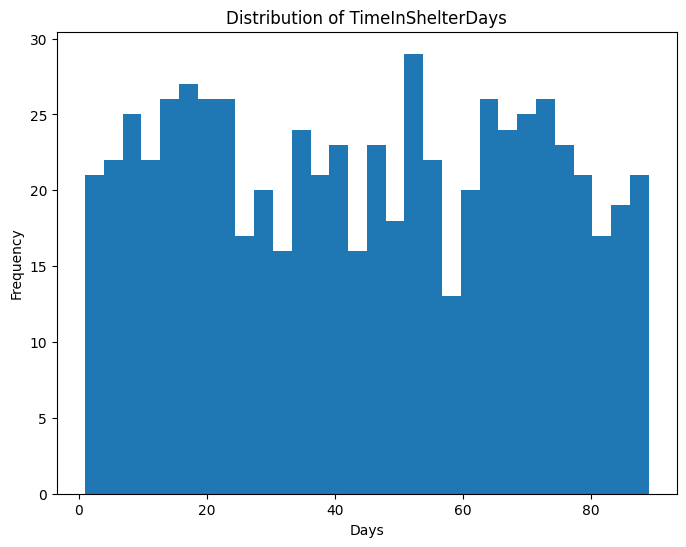

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



target_col = ['TimeInShelterDays','AdoptionLikelihood','WeightKg']

data_of_adopted = data_frame[data_frame['AdoptionLikelihood'] == 1]

# Split the data into features and target


y = data_of_adopted[target_col[0]]
X = data_of_adopted.drop(columns=target_col)


#X=scaler.fit_transform(X)
#i dont want to scale because its making a mess



# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

'''# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Normalize the target variable
target_scaler = MinMaxScaler()
y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val = target_scaler.transform(y_val.values.reshape(-1, 1)).flatten()
y_test = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()'''

# Verify the distribution of the target variable
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30)
plt.title('Distribution of TimeInShelterDays')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


In [51]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd


# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f'MAE: {mae}')
print(mae/data_frame['TimeInShelterDays'].std())
print(f'RMSE: {rmse}')



MAE: 21.330202020202016
0.8286710196495124
RMSE: 24.932954157706686


In [52]:
print(model.predict(X_test))

[43.43 45.38 47.73 30.08 41.11 39.32 39.68 49.31 24.89 45.69 34.22 39.17
 42.19 37.96 31.37 45.17 38.82 51.04 50.99 30.55 40.9  33.47 40.43 55.4
 44.3  32.75 44.06 43.5  48.22 47.7  51.59 47.85 47.77 44.06 39.19 46.11
 50.16 36.9  44.73 55.69 39.06 42.07 32.07 54.65 38.92 37.43 47.79 24.28
 47.78 45.93 51.9  42.28 48.32 57.51 37.24 43.3  52.18 46.01 58.66 42.39
 38.66 32.26 38.6  49.43 46.46 60.67 27.53 41.4  33.75 50.9  41.85 42.53
 40.83 44.51 42.1  47.22 33.48 43.55 50.57 45.66 31.03 40.92 38.23 42.2
 37.4  41.77 37.18 32.59 29.75 42.79 48.52 39.79 35.9  54.25 28.82 48.97
 66.51 38.21 48.09]


linear regression

MAE: 20.695551321184222
MSE: 555.5622110373714
RMSE: 23.570367223218465
R-squared: -0.050421809307662935


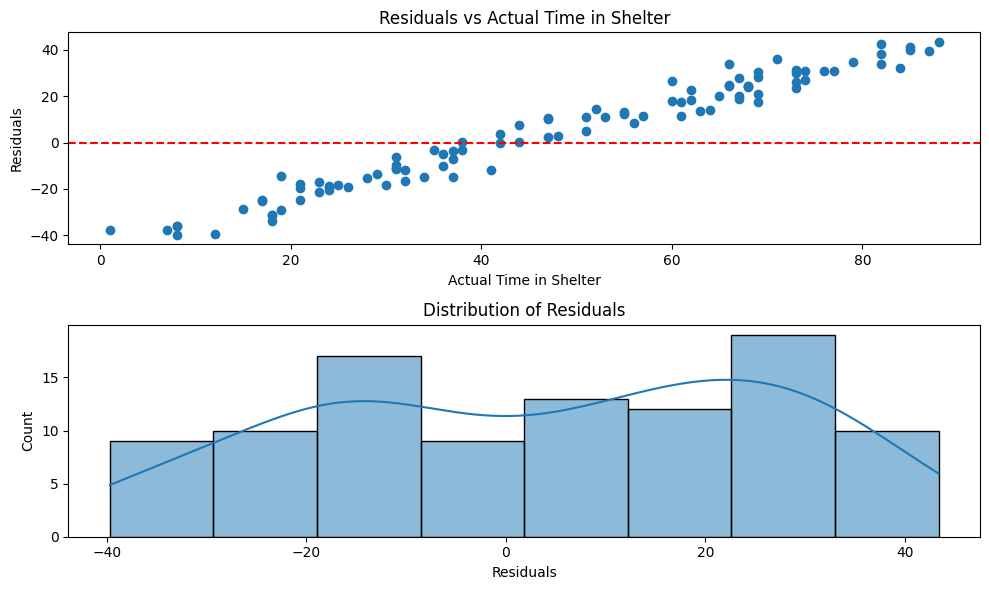

In [53]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

# Residual Analysis
residuals = y_test - y_pred

# Plotting residuals
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Residuals plot
plt.subplot(2, 1, 1)
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Time in Shelter')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Time in Shelter')

# Distribution of residuals
plt.subplot(2, 1, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()


now we will check if the pet types means are distributed differently, by the law of large numbers, we have more than 30 samples for each pet type so we know the mean of each type is distributed normally.

leets check if there is a difference in the TimeInShelter:

In [55]:
data_frame = pd.read_csv('pet_adoption_data.csv')

# Filter the data where AdoptionLikelihood is 1
data = data_frame[data_frame['AdoptionLikelihood'] == 1]


# Example data: Time in shelter until adoption for four different pet types
dogs=data[data['PetType'] == 'Dog']['TimeInShelterDays'].values.tolist()
cats=data[data['PetType'] == 'Cat']['TimeInShelterDays'].values.tolist()
birds=data[data['PetType'] == 'Bird']['TimeInShelterDays'].values.tolist()
rabbits = data[data['PetType'] == 'Rabbit']['TimeInShelterDays'].values.tolist()

# Combine all data to check for homogeneity of variances
all_data = [dogs, cats, birds, rabbits]

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p = stats.levene(*all_data)
print(f"Levene's test statistic: {levene_stat}")
print(f"Levene's test p-value: {levene_p}")

# If Levene's test p-value is > 0.05, we can assume homogeneity of variances
if levene_p > 0.05:
    print("Variances are homogeneous. Proceeding with ANOVA.")
    # Perform ANOVA
    f_statistic, p_value = stats.f_oneway(*all_data)
    print(f'F-statistic: {f_statistic}')
    print(f'P-value: {p_value}')

    # Interpreting the p-value
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the means of the different pet types.")
    else:
        print("There is no significant difference between the means of the different pet types.")
else:
    print("Variances are not homogeneous. Consider using Welch's ANOVA or a transformation.")


Levene's test statistic: 0.23851512236587893
Levene's test p-value: 0.8695050066659501
Variances are homogeneous. Proceeding with ANOVA.
F-statistic: 1.0340666170893742
P-value: 0.3768748022732423
There is no significant difference between the means of the different pet types.


lets performe H-test

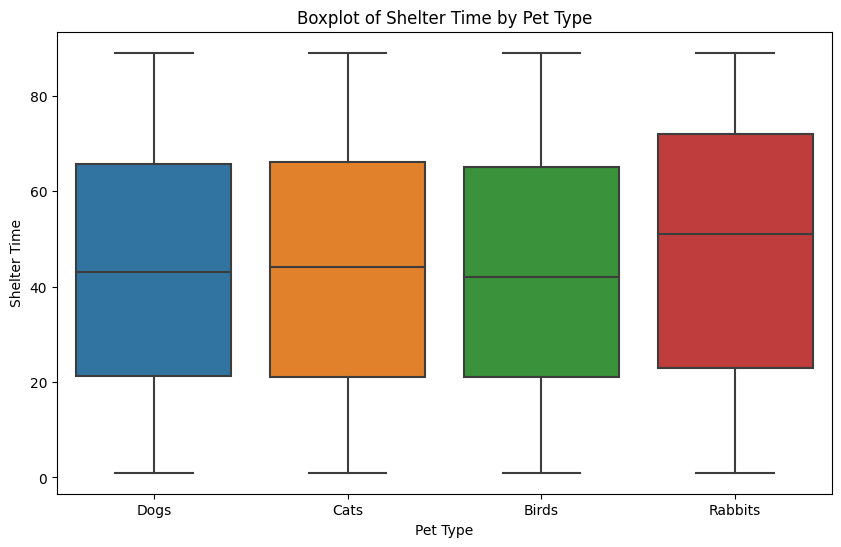

H-statistic: 3.099545761112684
P-value: 0.37653037399696454
There is no significant difference between the medians of the different pet types.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Combine data into a DataFrame for visualizations
data = {
    'Pet Type': ['Dogs'] * len(dogs) + ['Cats'] * len(cats) + ['Birds'] * len(birds) + ['Rabbits'] * len(rabbits),
    'Shelter Time': dogs + cats + birds + rabbits
}
df = pd.DataFrame(data)

# Create a boxplot to visualize the distribution of each group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pet Type', y='Shelter Time', data=df)
plt.title('Boxplot of Shelter Time by Pet Type')
plt.show()


# Perform Kruskal-Wallis H test
h_statistic, p_value = stats.kruskal(dogs, cats, birds, rabbits)

print(f'H-statistic: {h_statistic}')
print(f'P-value: {p_value}')

# Interpreting the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the medians of the different pet types.")
else:
    print("There is no significant difference between the medians of the different pet types.")

now because we know There is no significant difference between the medians of the different pet types lets performe H-test on different features until we encounter a change:

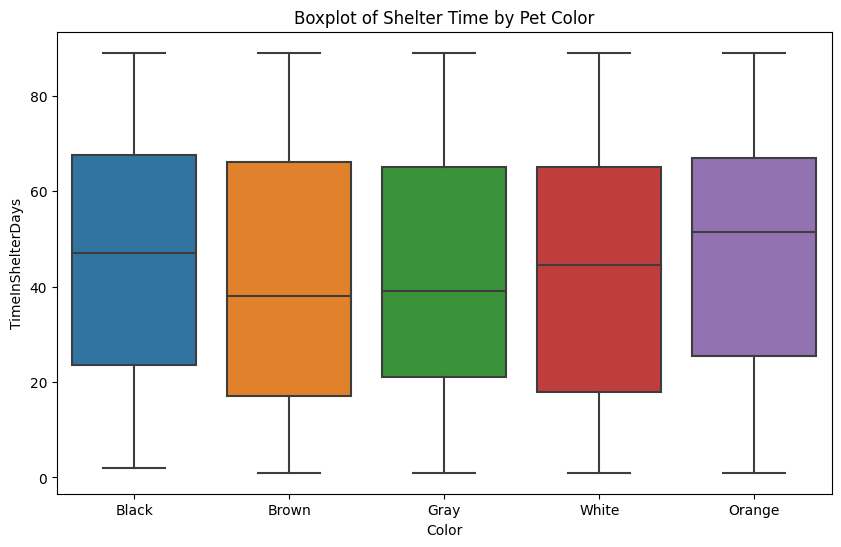

H-statistic: 5.709933276808402
P-value: 0.22188317252023101
There is no significant difference between the medians of the different pet colors.


In [ ]:
# Filter the data where AdoptionLikelihood is 1
data = data_frame[data_frame['AdoptionLikelihood'] == 1]

# Example data: Time in shelter until adoption for four different color
Black=data[data['Color'] == 'Black']['TimeInShelterDays'].values.tolist()
Brown=data[data['Color'] == 'Brown']['TimeInShelterDays'].values.tolist()
Gray=data[data['Color'] == 'Gray']['TimeInShelterDays'].values.tolist()
White = data[data['Color'] == 'White']['TimeInShelterDays'].values.tolist()
Orange = data[data['Color'] == 'Orange']['TimeInShelterDays'].values.tolist()


# Combine data into a DataFrame for visualizations
color_labels = (
    ['Black'] * len(Black) + 
    ['Brown'] * len(Brown) + 
    ['Gray'] * len(Gray) + 
    ['White'] * len(White) + 
    ['Orange'] * len(Orange)
)
time_in_shelter = Black + Brown + Gray + White + Orange

data_for_plot = {
    'Color': color_labels,
    'TimeInShelterDays': time_in_shelter
}
df = pd.DataFrame(data_for_plot)

# Create a boxplot to visualize the distribution of each group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Color', y='TimeInShelterDays', data=df)
plt.title('Boxplot of Shelter Time by Pet Color')
plt.show()

# Perform Kruskal-Wallis H test
h_statistic, p_value = stats.kruskal(Black, Brown, Gray, White, Orange)

print(f'H-statistic: {h_statistic}')
print(f'P-value: {p_value}')

# Interpreting the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the medians of the different pet colors.")
else:
    print("There is no significant difference between the medians of the different pet colors.")

